In [1]:
pip install cv2imshow

Note: you may need to restart the kernel to use updated packages.


In [2]:
  !pip install --upgrade tensorflow_hub

In [3]:
import tensorflow as tf
import cv2
import numpy as np
import tensorflow_hub as hub
import PIL
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

#loading dataset

In [5]:
content_path = "dog.jpg"
style_path = "theme.jpg"
dog_image = load_img(content_path)
style_image = load_img(style_path)
dog = cv2.imread(content_path)
style = cv2.imread(style_path)

#changing to tensor image


In [7]:
def load_img(path_to_img):
 img = tf.io.read_file(path_to_img)
 img = tf.image.decode_image(img, channels=3)
 img = tf.image.convert_image_dtype(img, tf.float32)
 img = img[tf.newaxis, :]
 return img

# visualizing images

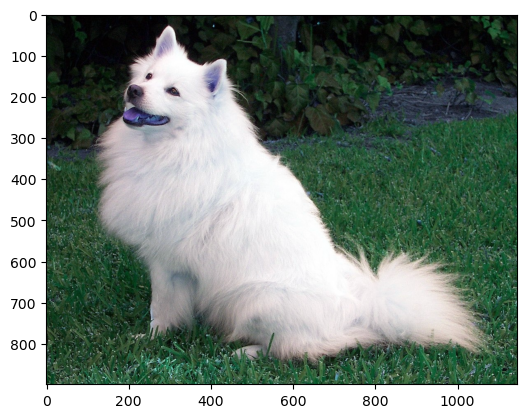

In [9]:
plt.imshow(dog)

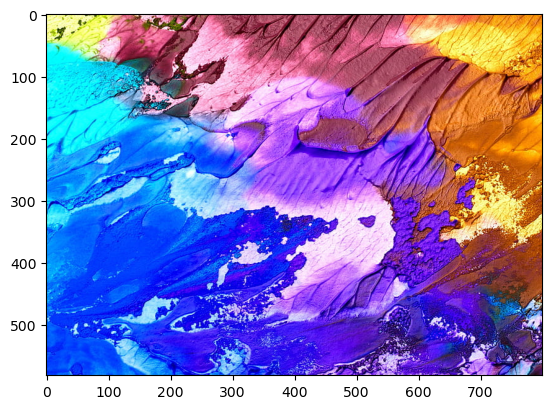

In [11]:
plt.imshow(style)

#tensor to image

In [13]:
def tensor_to_image(tensor):
 tensor = tensor*255
 tensor = np.array(tensor, dtype=np.uint8)
 if np.ndim(tensor)>3:
  assert tensor.shape[0] == 1
 tensor = tensor[0]
 return PIL.Image.fromarray(tensor)

#performing style transfer

In [15]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


In [16]:
import tensorflow as tf
import numpy as np

# Convert PIL images to NumPy arrays and normalize
dog_array = np.array(dog_image) / 255.0
style_array = np.array(style_image) / 255.0

# Convert NumPy arrays to TensorFlow tensors and expand dimensions
# The model might be expecting tensors with shape (1, height, width, channels)
dog_tensor = tf.expand_dims(tf.constant(dog_array, dtype=tf.float32), axis=0)
style_tensor = tf.expand_dims(tf.constant(style_array, dtype=tf.float32), axis=0)

# Apply the style transfer model
stylized_image = hub_model(dog_tensor, style_tensor)[0]

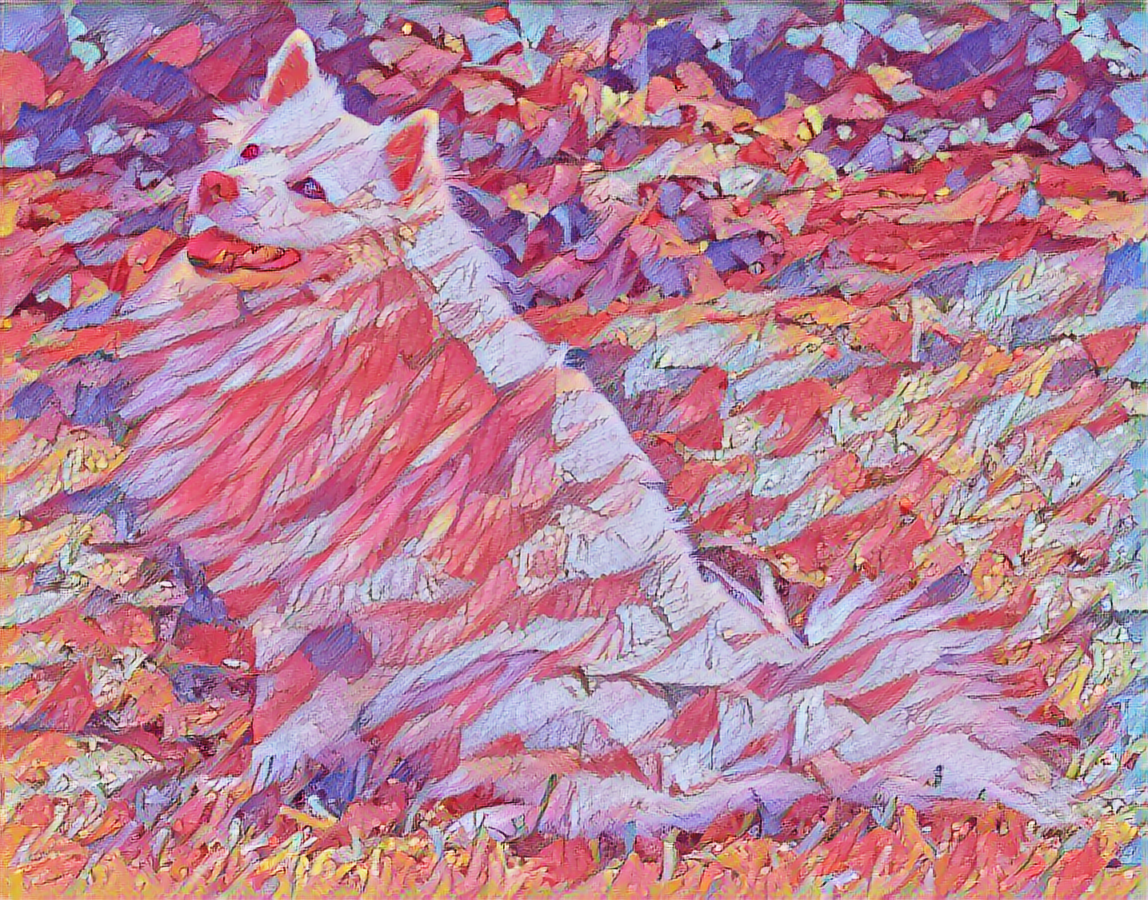

In [17]:
op = tensor_to_image(stylized_image)
op